In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = pd.read_hdf("../data/train.h5", )

### Aggregate series visualization

In [111]:
store_sum = data.groupby(['day', 'state_id'])['sales'].sum().unstack(level=1)

<AxesSubplot:xlabel='day'>

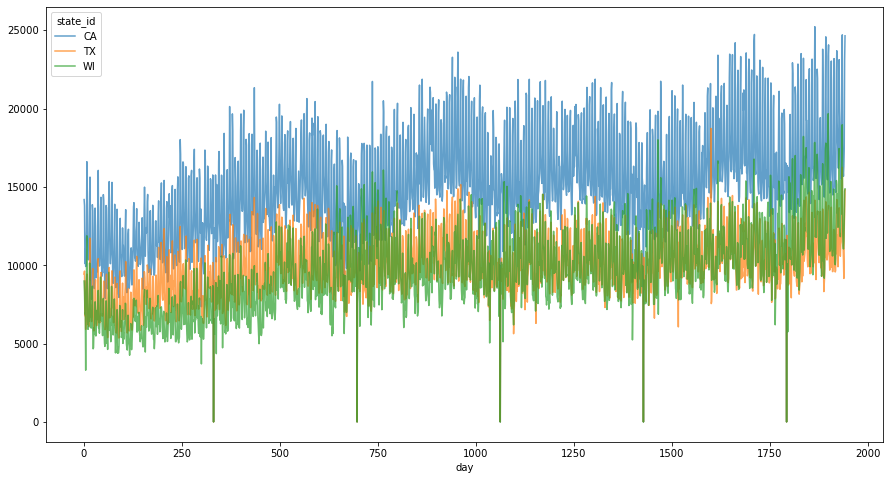

In [112]:
store_sum.plot(figsize=(15, 8), alpha=.7)

### dataset info

In [15]:
data[data['id']=='HOBBIES_1_001_CA_1_evaluation'].shape

(1941, 64)

In [82]:
data['id'].nunique()

30490

In [83]:
data['d'].max()

1941

### correlation of different levels

In [19]:
def sales_corr_at_level(data, level):
    total_sales = data.groupby([level, 'd'])['sales'].sum().unstack(level=0)
    return total_sales.corr()

<AxesSubplot:xlabel='dept_id', ylabel='dept_id'>

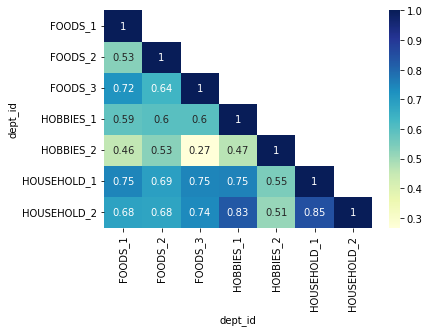

In [29]:
corr = sales_corr_at_level(data, 'dept_id')
mask = np.triu(corr, k=1)
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu')

<AxesSubplot:xlabel='store_id', ylabel='store_id'>

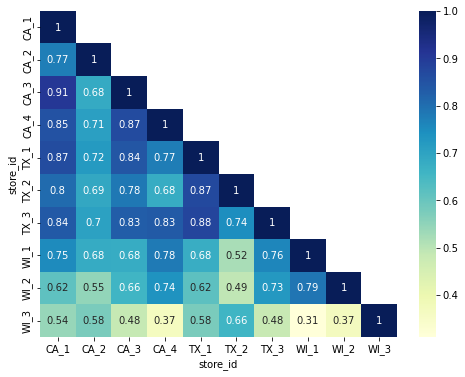

In [34]:
# corr = sales_corr_at_level(data, 'store_id')
mask = np.triu(corr, k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu')

### Correlation with the target

In [62]:

dump_cols = [
    "id",
    "wm_y_wk",
    "event_name",
    "d",
    "day",
    "event_type",
    "wm_yr_wk",
    "weekday",
    "date",
] + [c for c in data.columns if c.startswith("target")]
feat_cols = [c for c in data.columns if c not in dump_cols]
cat_cols = [
    "item_id",
    "dept_id",
    "cat_id",
    "store_id",
    "state_id",
    "event_name_shift_3",
    "event_name_shift_7",
    "event_name_shift_14",
    "event_name_shift_28",
    "event_type_shift_3",
    "event_type_shift_7",
    "event_type_shift_14",
    "event_type_shift_28",
]
cont_cols = [c for c in feat_cols if c not in cat_cols]
target_cols = [c for c in data.columns if c.startswith("target")]

In [70]:
corr_feature = data.corr()

<AxesSubplot:>

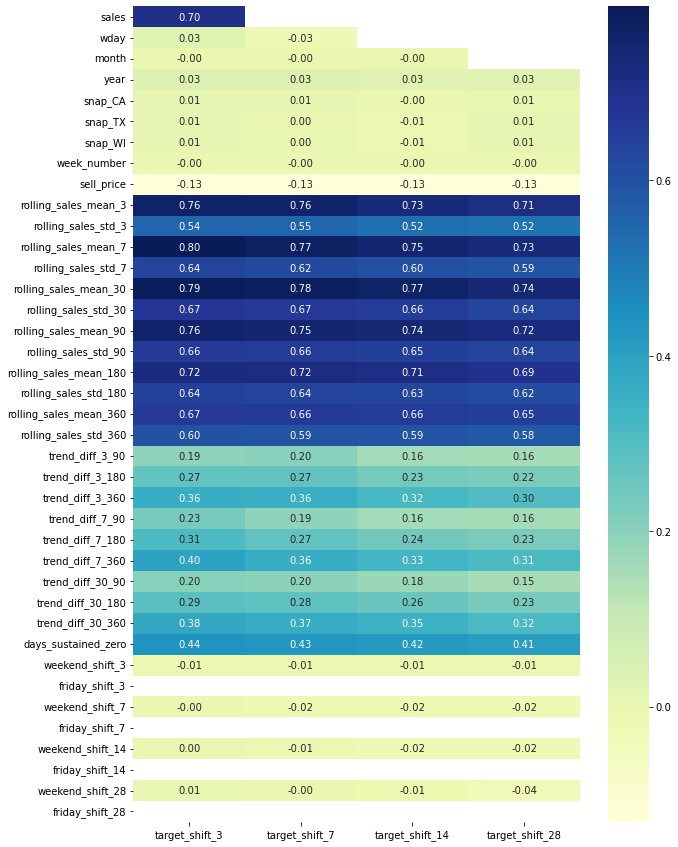

In [80]:
mask = np.triu(corr_feature.loc[cont_cols, target_cols], k=1)
plt.figure(figsize=(10, 15))
sns.heatmap(corr_feature.loc[cont_cols, target_cols], mask=mask, annot=True, cmap='YlGnBu', fmt='.2f')